In [1]:
import pandas as pd



In [73]:
df = pd.read_csv("Attrition data.csv")
file.head
print(df.columns)

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')


In [86]:
# Check for missing values
print(df.isnull().sum())

Age                                  0
Attrition                            0
DistanceFromHome                     0
Education                            0
Gender                               0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
Over18                               0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
EnvironmentSatisfaction              0
JobSatisfaction                      0
WorkLifeBalance                      0
JobInvolvement                       0
PerformanceRating                    0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales                     0
EducationField_Life Scien

In [82]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)


In [84]:
# Verify that there are no missing values
print(df.isnull().sum())
# Check data types of each column
print(df.dtypes)


Age                                  0
Attrition                            0
DistanceFromHome                     0
Education                            0
Gender                               0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
Over18                               0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
EnvironmentSatisfaction              0
JobSatisfaction                      0
WorkLifeBalance                      0
JobInvolvement                       0
PerformanceRating                    0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales                     0
EducationField_Life Scien

In [75]:
# Ensure 'Attrition' column exists and convert to numeric
if 'Attrition' in df.columns:
    df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
else:
    raise KeyError('Column Attrition not found in the dataframe')

# Ensure 'Over18' column exists and convert to numeric
if 'Over18' in df.columns:
    df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
else:
    raise KeyError('Column Over18 not found in the dataframe')

# Ensure 'Gender' column exists and convert to numeric
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
else:
    raise KeyError('Column Gender not found in the dataframe')

# Convert categorical columns using one-hot encoding
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Drop columns that won't be used in the model (e.g., EmployeeID, EmployeeCount, StandardHours)
df.drop(columns=['EmployeeID', 'EmployeeCount', 'StandardHours'], inplace=True)

# Display the first few rows of the modified dataframe
print(df.head())

# Check the data types again to ensure all are numeric
print(df.dtypes)


   Age  Attrition  DistanceFromHome  Education  Gender  JobLevel  \
0   51          0                 6          2       0         1   
1   31          1                10          1       0         1   
2   32          0                17          4       1         4   
3   38          0                 2          5       1         3   
4   32          0                10          1       1         1   

   MonthlyIncome  NumCompaniesWorked  Over18  PercentSalaryHike  ...  \
0         131160                 1.0       1                 11  ...   
1          41890                 0.0       1                 23  ...   
2         193280                 1.0       1                 15  ...   
3          83210                 3.0       1                 11  ...   
4          23420                 4.0       1                 12  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1 

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

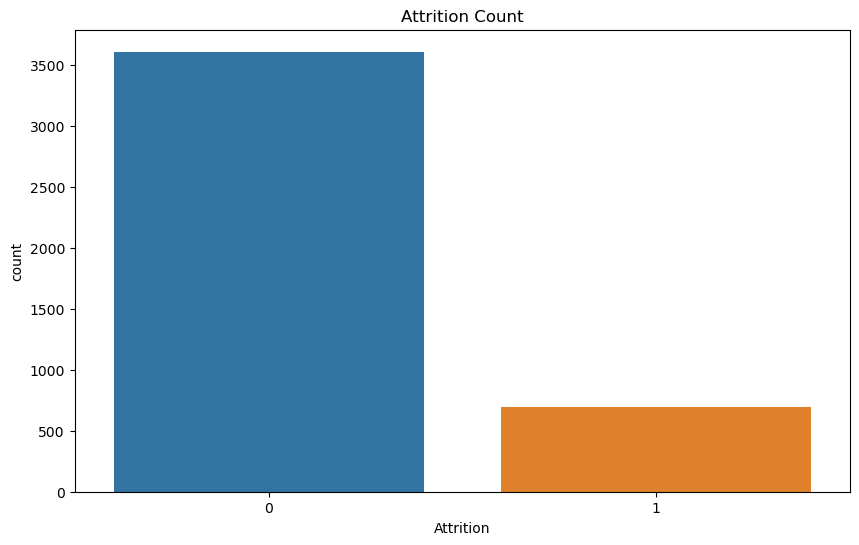

In [87]:
# 1. Visualize the distribution of Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

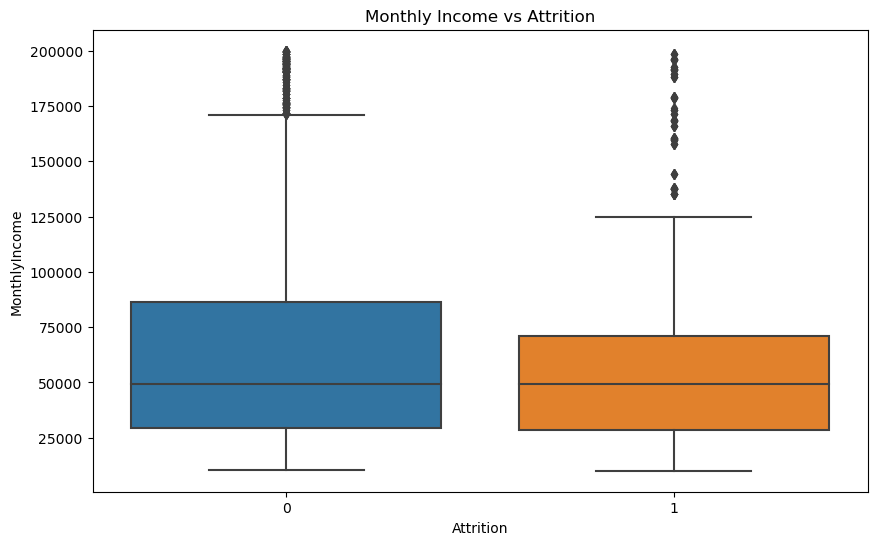

In [88]:
# 2. Visualize relationships between key features and attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

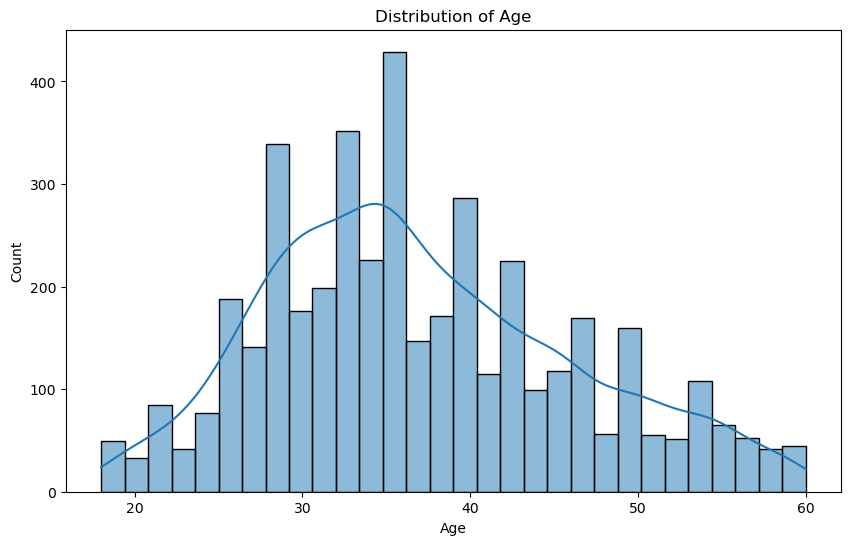

In [89]:
# 3. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

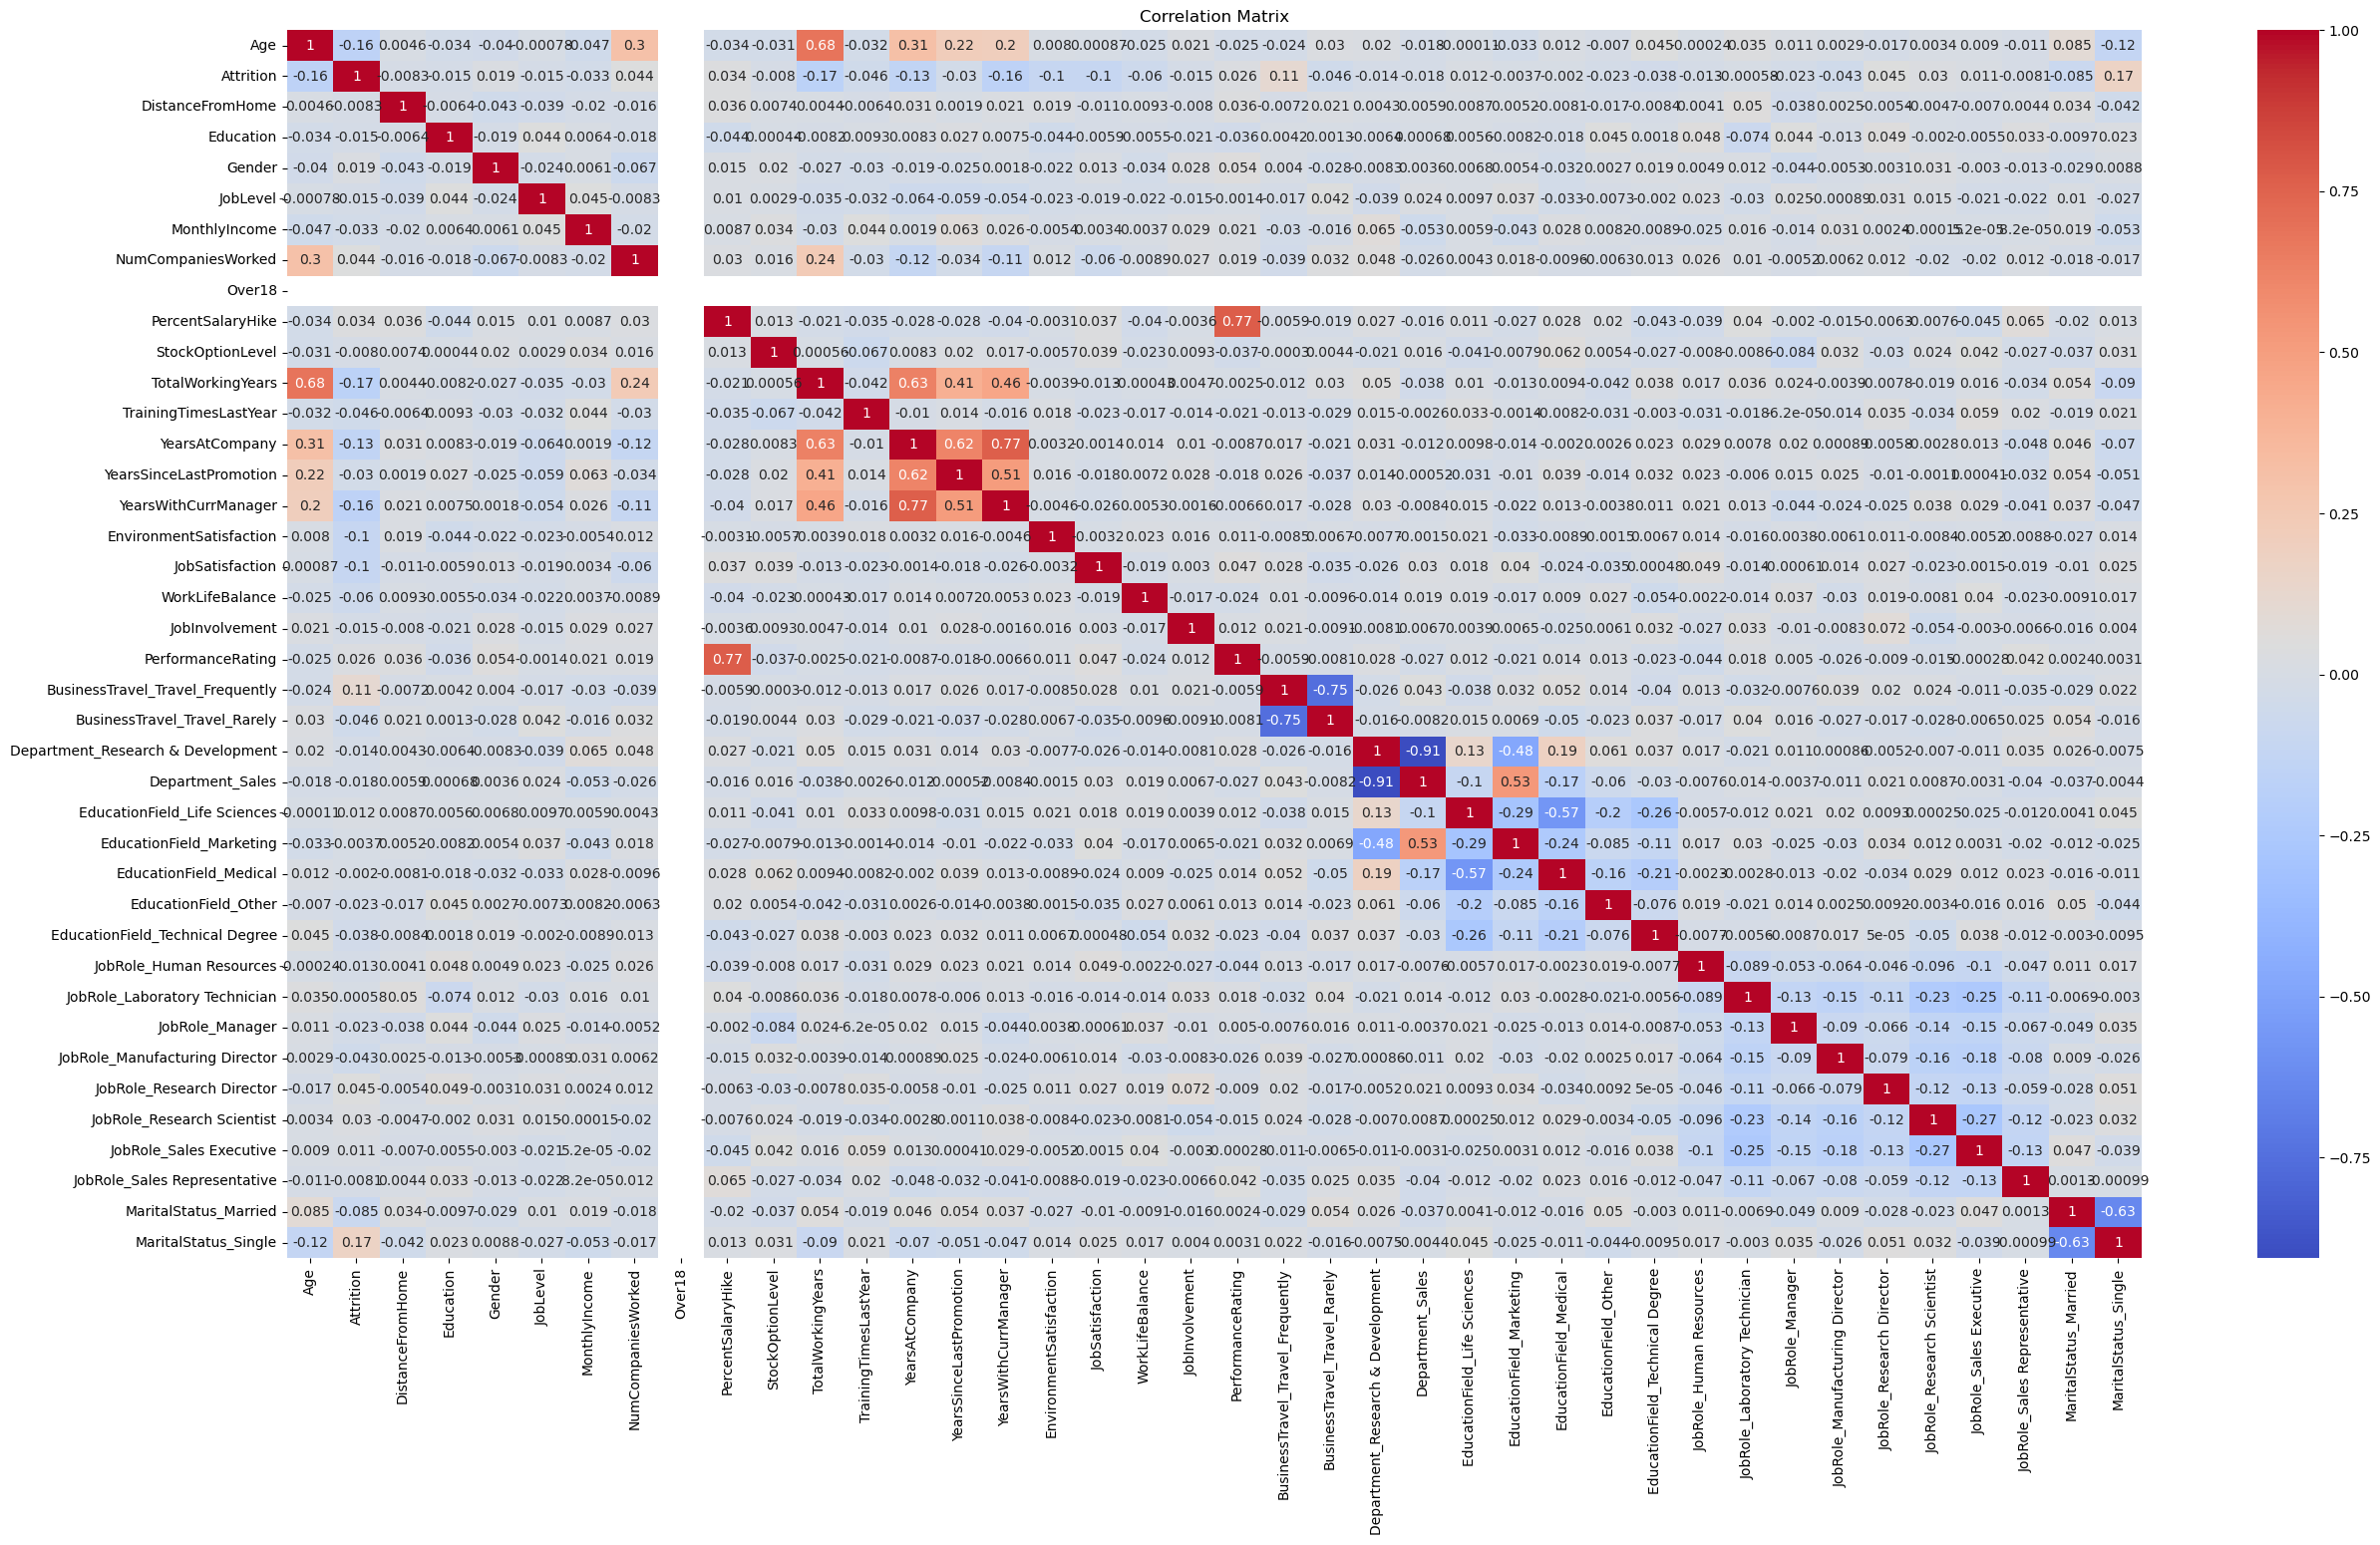

In [97]:
# 4. Correlation matrix to see relationships between numeric variables
plt.figure(figsize=(30, 16))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



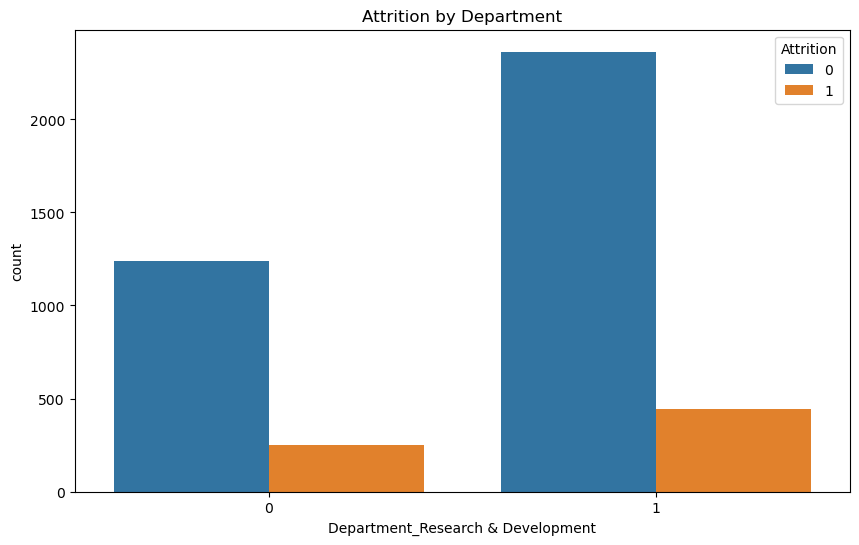

In [94]:
# 5. Attrition by Department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department_Research & Development', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.show()

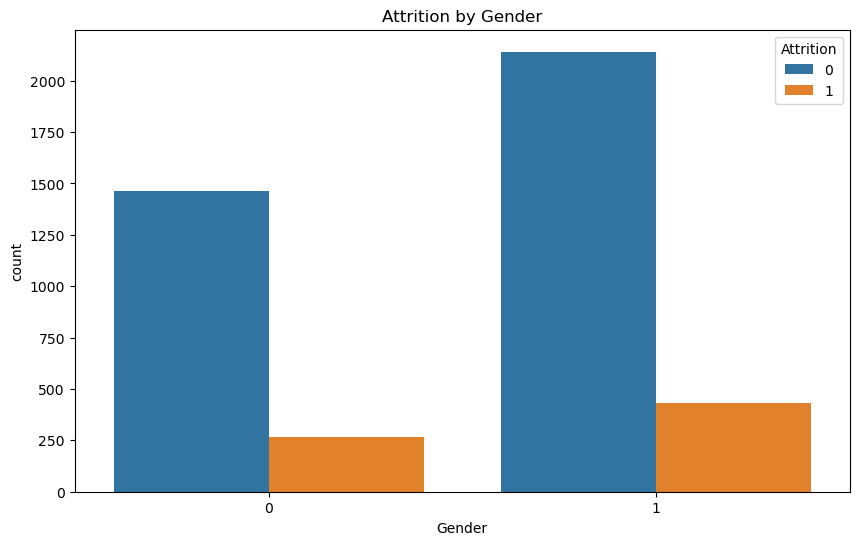

In [95]:
# 6. Attrition by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition by Gender')
plt.show()



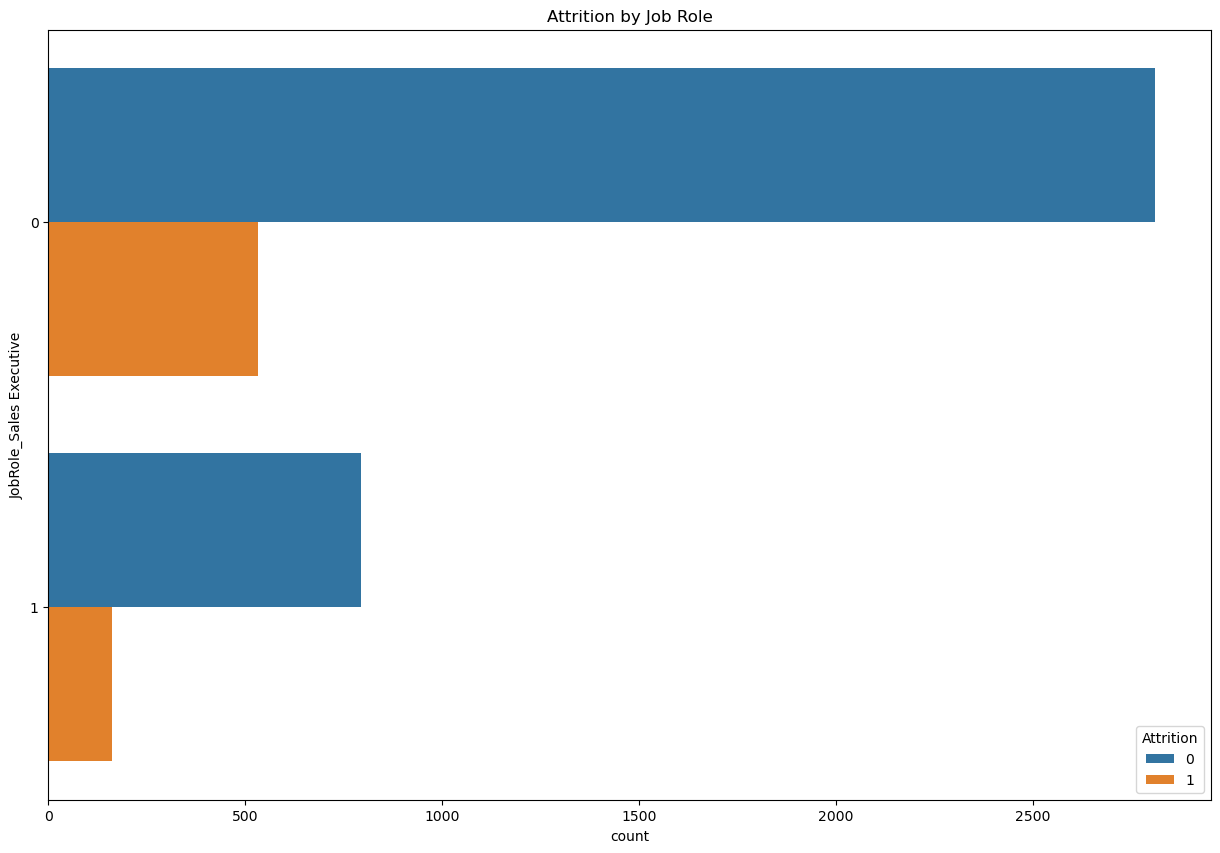

In [96]:
# 7. Attrition by Job Role
plt.figure(figsize=(15, 10))
sns.countplot(y='JobRole_Sales Executive', hue='Attrition', data=df)
plt.title('Attrition by Job Role')
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.84
[[1081    0]
 [ 209    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1081
           1       0.00      0.00      0.00       209

    accuracy                           0.84      1290
   macro avg       0.42      0.50      0.46      1290
weighted avg       0.70      0.84      0.76      1290



C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [79]:
# Save the processed dataframe to a CSV file for easy loading into Tableau or Power BI
df.to_csv('processed_employee_attrition_data.csv', index=False)


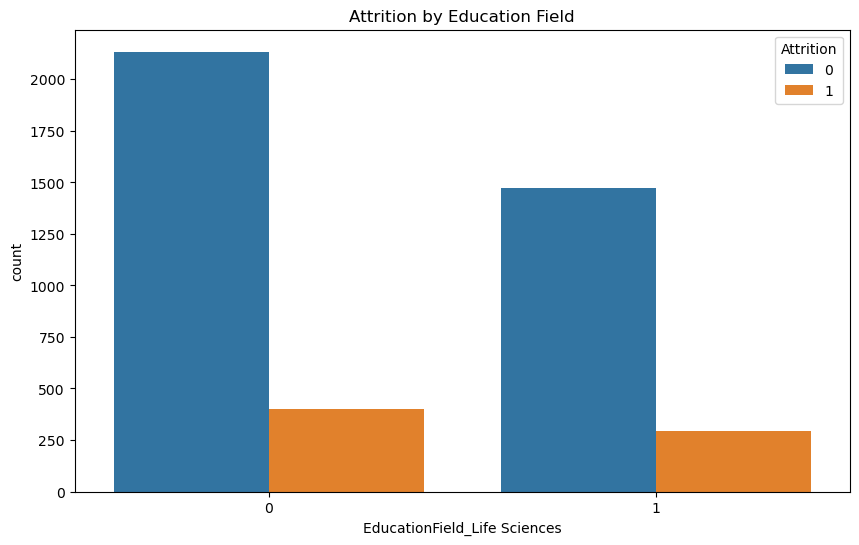

In [100]:
# 8. Attrition by Education Field
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField_Life Sciences', hue='Attrition', data=df)
plt.title('Attrition by Education Field')
plt.show()







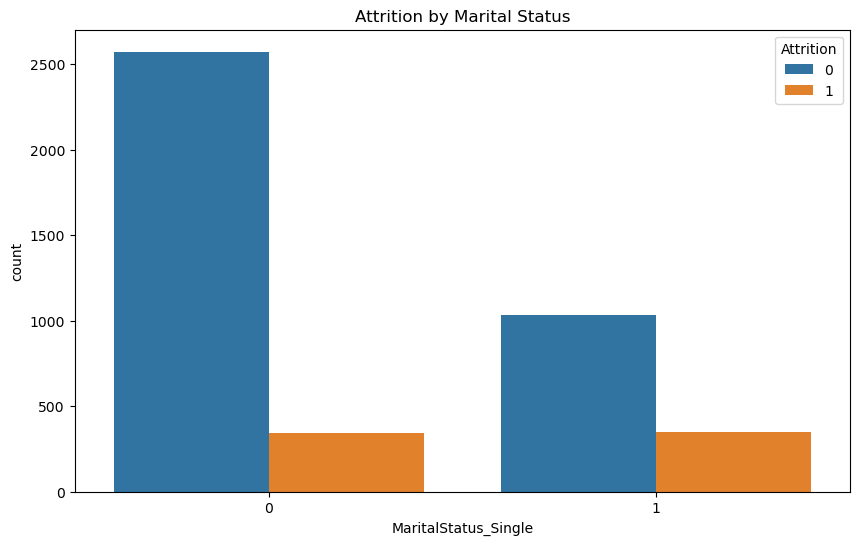

In [99]:
# 9. Attrition by Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus_Single', hue='Attrition', data=df)
plt.title('Attrition by Marital Status')
plt.show()

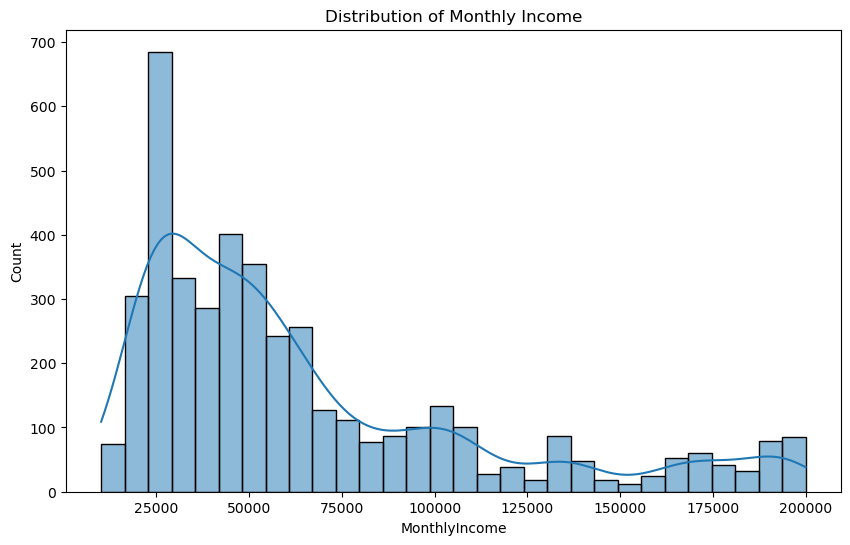

In [101]:
# 10. Distribution of Monthly Income
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True)
plt.title('Distribution of Monthly Income')
plt.show()